# Load packages

In [1]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential, layers, optimizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator


from sklearn.model_selection import train_test_split


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import os
#from PIL import Image
import cv2

2022-11-25 17:06:08.784664: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-25 17:06:10.258597: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-11-25 17:06:10.258684: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2022-11-25 17:06:10.258693: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

# Load data

In [2]:
data_path = 'coffee/'

In [10]:
classes_name = os.listdir(os.path.join(data_path))
classes_name

['MarronAVinagre',
 'CerezaSeca',
 'Pergamino',
 'BrocadoSevero',
 'Concha',
 'Negros',
 'Normales',
 'DXHongo',
 'PMordidoCortado',
 'BrocadoLeve',
 'Inmaduro']

In [11]:
classes_name_final = []
for i in range(len(classes_name)):
    images_name = os.listdir(os.path.join(data_path, classes_name[i]))
    #print(images_name)
    print(classes_name[i], len(images_name))
    if len(images_name) > 20:
        classes_name_final.append(classes_name[i])
classes_name = classes_name_final
#num_classes = len(classes_name)
classes_name_final

MarronAVinagre 30
CerezaSeca 9
Pergamino 64
BrocadoSevero 25
Concha 30
Negros 89
Normales 30
DXHongo 12
PMordidoCortado 29
BrocadoLeve 30
Inmaduro 16


['MarronAVinagre',
 'Pergamino',
 'BrocadoSevero',
 'Concha',
 'Negros',
 'Normales',
 'PMordidoCortado',
 'BrocadoLeve']

In [5]:
# path = os.path.join(data_path, classes_name[0],'0.jpg')
# image = Image.open(path)
# image.dtype
#print(len(image.size))
# image = image.resize((256, 256))
# plt.imshow(image)#.size

coffee/MarronAVinagre


<Figure size 2000x1500 with 0 Axes>

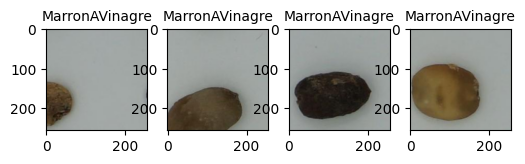

coffee/Pergamino


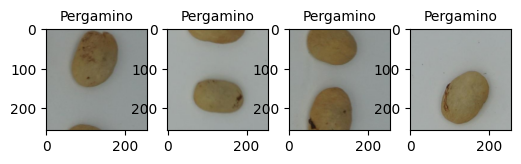

coffee/BrocadoSevero


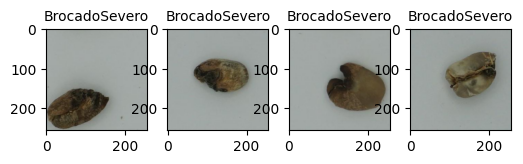

coffee/Concha


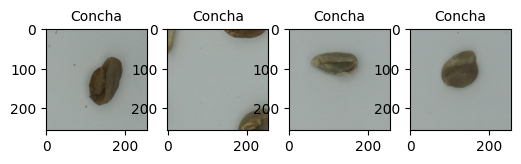

coffee/Negros


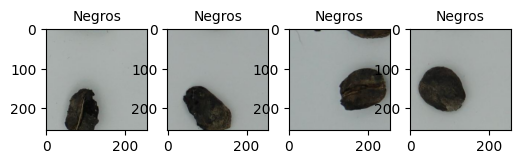

coffee/Normales


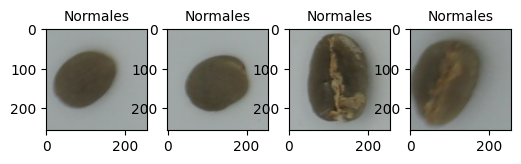

coffee/PMordidoCortado


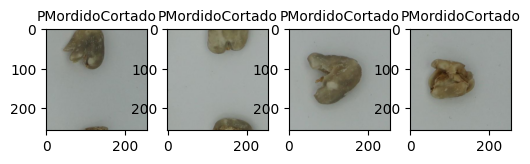

coffee/BrocadoLeve


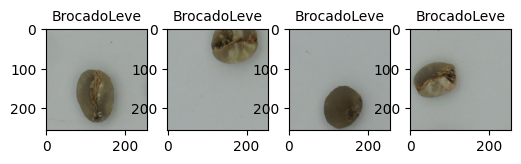

In [270]:
plt.figure(figsize=(20,15))
for i in range(len(classes_name)):
        images_name = os.listdir(os.path.join(data_path, classes_name[i]))
        print(os.path.join(data_path, classes_name[i]))
        _, axs = plt.subplots(1, 4, figsize=(6, 2))
        for ind, img_name in enumerate(images_name):
            path = os.path.join(data_path, classes_name[i], img_name)
            image = cv2.imread(path)
            dim = (256, 256)
            resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
            axs[ind].imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))
            axs[ind].set_title(classes_name[i], fontsize=10)
            
            if ind > 2:
                break
        plt.show()

In [8]:
def load_data():
    
    imgs = []
    labels = []
    for i in range(len(classes_name)):
        images_name = os.listdir(os.path.join(data_path, classes_name[i]))
        for ind, img_name in enumerate(images_name):
            path = os.path.join(data_path, classes_name[i], img_name)
            image = cv2.imread(path)
            dim = (256, 256)
            resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
            imgs.append(np.array(resized))
            labels.append(i)
        
    X = np.array(imgs).astype(np.float32)
    y = np.array(labels)
    
 
    return X, y

In [9]:
X, y = load_data()

In [10]:
X.dtype

dtype('float32')

In [11]:
np.unique(y, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 array([30, 64, 25, 30, 89, 30, 29, 30, 16]))

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=43)

In [275]:
y_train.shape, X_train[0].shape

((228,), (256, 256, 3))

In [276]:
print(np.unique(y_train, return_counts=True))
print(np.unique(y_test, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7]), array([23, 40, 18, 17, 67, 19, 21, 23]))
(array([0, 1, 2, 3, 4, 5, 6, 7]), array([ 7, 24,  7, 13, 22, 11,  8,  7]))


In [277]:
#, X_val, y_val,

In [278]:
#print(X_train.shape, X_val.shape, X_test.shape)

In [13]:
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)
y_train_cat.shape, y_test_cat.shape

((240, 9), (103, 9))

In [392]:

datagen = ImageDataGenerator(
    zca_epsilon = 1e0,
    interpolation_order = 0,
    #featurewise_center = False,
    #featurewise_std_normalization = False,
    rotation_range = 10,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True,
    zoom_range = (0.8, 1.2),
    ) 

datagen.fit(X_train)
datagen

In [393]:
X_augmented_iterator = datagen.flow(X_train, shuffle=False, batch_size=1)
X_augmented_iterator

In [394]:
X_augmented_iterator[0].shape

(1, 256, 256, 3)

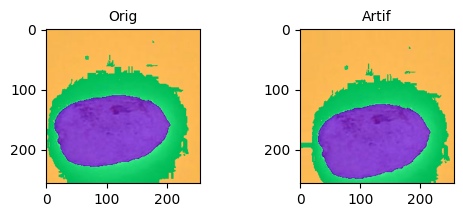

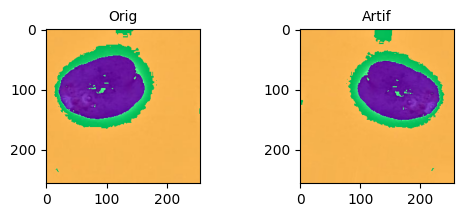

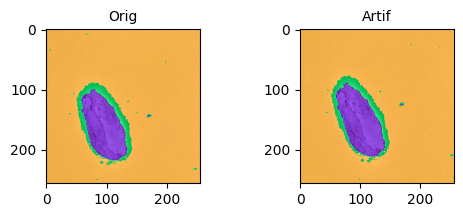

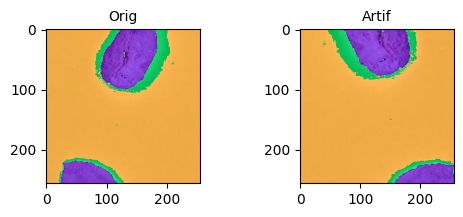

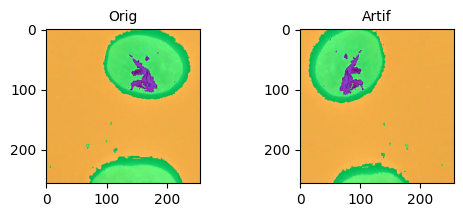

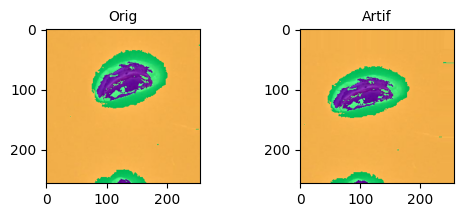

In [395]:
for i, (raw_image, augmented_image) in enumerate(zip(X_train, X_augmented_iterator)):
    _, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 2))
    ax1.imshow((raw_image * 255).astype(np.uint8))
    ax1.set_title("Orig", fontsize=10)
    ax2.imshow((augmented_image[0] * 255).astype(np.uint8))
    ax2.set_title("Artif", fontsize=10)
    plt.show()
    
    if i > 4:
        break

# Load model

In [321]:
def build_model(num_classes, model_name = 'VGG16'):
    if model_name == 'VGG16':
        backbone_model = VGG16(weights="imagenet", include_top=False, input_shape=X_train[0].shape)
    
    backbone_model.trainable = False
    
    model = Sequential([
        backbone_model,
        layers.Flatten(),
        layers.Dense(500, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    opt = optimizers.Adam(learning_rate=1e-4)
    model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
    
    return model 

In [400]:
model = build_model(num_classes = len(classes_name))
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_12 (Flatten)        (None, 32768)             0         
                                                                 
 dense_24 (Dense)            (None, 500)               16384500  
                                                                 
 dense_25 (Dense)            (None, 8)                 4008      
                                                                 
Total params: 31,103,196
Trainable params: 16,388,508
Non-trainable params: 14,714,688
_________________________________________________________________


In [328]:
X_train_prep = preprocess_input(X_train) 
#X_val = preprocess_input(X_val)
X_test_prep = preprocess_input(X_test)
X_train_prep.shape, X_test_prep.shape

((228, 256, 256, 3), (99, 256, 256, 3))

In [401]:
train_flow = datagen.flow(X_train, y_train_cat, batch_size = 16)

In [402]:
es = EarlyStopping(monitor = 'val_accuracy', 
                   mode = 'max', 
                   patience = 5, 
                   verbose = 1, 
                   restore_best_weights = True)

# history = model.fit(X_train, y_train_cat, 
#                     validation_data=(X_test, y_test_cat), 
#                     epochs=50, 
#                     batch_size=16, 
#                     callbacks=[es])
history = model.fit(train_flow, 
                    validation_data=(X_test, y_test_cat), 
                    epochs=50,
                    callbacks=[es])

Epoch 1/50
15/15 [==============================] - 4s 227ms/step - loss: 6.4698 - accuracy: 0.4430 - val_loss: 3.9226 - val_accuracy: 0.7374
Epoch 2/50
15/15 [==============================] - 3s 188ms/step - loss: 2.8673 - accuracy: 0.7325 - val_loss: 3.5108 - val_accuracy: 0.7576
Epoch 3/50
15/15 [==============================] - 3s 189ms/step - loss: 2.2977 - accuracy: 0.7851 - val_loss: 3.1605 - val_accuracy: 0.8283
Epoch 4/50
15/15 [==============================] - 3s 179ms/step - loss: 1.4717 - accuracy: 0.8728 - val_loss: 3.2413 - val_accuracy: 0.7576
Epoch 5/50
15/15 [==============================] - 3s 176ms/step - loss: 1.3361 - accuracy: 0.8377 - val_loss: 3.4401 - val_accuracy: 0.7374
Epoch 6/50
15/15 [==============================] - 3s 187ms/step - loss: 0.5547 - accuracy: 0.9298 - val_loss: 1.7322 - val_accuracy: 0.8485
Epoch 7/50
15/15 [==============================] - 3s 177ms/step - loss: 1.1113 - accuracy: 0.8947 - val_loss: 2.8212 - val_accuracy: 0.8384
Epoch 

In [403]:
def plot_history(history, title='', axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    ax1.plot(history.history['loss'], label='train' + exp_name)
    ax1.plot(history.history['val_loss'], label='val' + exp_name)
    #ax1.set_ylim(0., 2.2)
    ax1.set_title('loss')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='train accuracy'  + exp_name)
    ax2.plot(history.history['val_accuracy'], label='val accuracy'  + exp_name)
    #ax2.set_ylim(0.25, 1.)
    ax2.set_title('Accuracy')
    ax2.legend()
    return (ax1, ax2)

(<AxesSubplot: title={'center': 'loss'}>,
 <AxesSubplot: title={'center': 'Accuracy'}>)

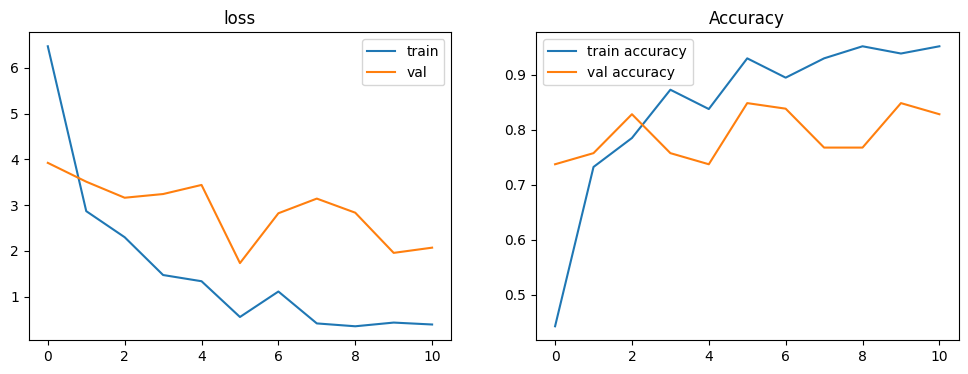

In [404]:
plot_history(history)

In [405]:
!mkdir -p saved_model_v2
model.save('saved_model_v2/my_model')

INFO:tensorflow:Assets written to: saved_model_v2/my_model/assets


INFO:tensorflow:Assets written to: saved_model_v2/my_model/assets


In [2]:

new_model = tf.keras.models.load_model('saved_model_v2/my_model')

# Check its architecture
new_model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_12 (Flatten)        (None, 32768)             0         
                                                                 
 dense_24 (Dense)            (None, 500)               16384500  
                                                                 
 dense_25 (Dense)            (None, 8)                 4008      
                                                                 
Total params: 31,103,196
Trainable params: 16,388,508
Non-trainable params: 14,714,688
_________________________________________________________________


In [15]:
logits = new_model.predict(np.expand_dims(X_test[0], 0))
#print(logits)
tf.math.argmax(tf.nn.softmax(logits), 1).numpy()[0]

2022-11-24 19:19:13.412513: W tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:115] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

You may not need to update to CUDA 11.1; cherry-picking the ptxas binary is often sufficient.


1/1 [==============================] - 4s 4s/step


1

: 

In [407]:
loss, acc = new_model.evaluate(X_test, y_test_cat, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))
pred_test = new_model.predict(X_test)
print(pred_test.shape)

4/4 - 1s - loss: 1.7322 - accuracy: 0.8485 - 699ms/epoch - 175ms/step
Restored model, accuracy: 84.85%
4/4 [==============================] - 1s 133ms/step
(99, 8)


In [27]:
new_model.save('my_model.h5')

In [51]:

# res_vgg = model.evaluate(X_test, y_test)

# test_accuracy_vgg = res_vgg[-1]


# print(f"test_accuracy_vgg = {round(test_accuracy_vgg,2)*100} %")

# print(f"test_accuracy = {round(test_accuracy_vgg,2)*100} %")

# print(f'Chance level: {1./num_classes*100:.1f}%')


2/2 [==============================] - 0s 77ms/step - loss: 7.6805 - accuracy: 0.4250
test_accuracy_vgg = 43.0 %
test_accuracy = 43.0 %
Chance level: 12.5%


In [267]:
#model.evaluate(X_test, y_test)